# IMPORT

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# DATASET

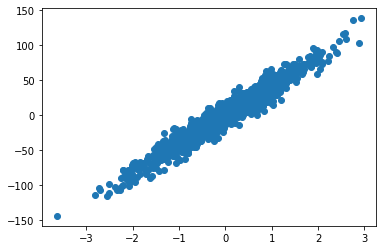

In [2]:
sample=1000
x,y = make_regression(n_samples=sample, n_features=1, noise=10)
#y = y + abs(y/2)
plt.scatter(x[:,0],y)

In [3]:
print(x.shape)
y = y.reshape(sample,1)
print(y.shape)

(1000, 1)
(1000, 1)


In [4]:
print(x.shape[0])
X = np.hstack((x, np.ones((x.shape[0],1))))

1000


In [5]:
print(X[:10])

[[ 0.95696053  1.        ]
 [ 0.99264165  1.        ]
 [ 0.63007656  1.        ]
 [ 0.16870791  1.        ]
 [ 0.12989153  1.        ]
 [-0.81872508  1.        ]
 [-0.18951631  1.        ]
 [-0.8024987   1.        ]
 [-0.99080353  1.        ]
 [ 1.59328527  1.        ]]


In [6]:
theta = np.random.randn(2,1)
theta

array([[-0.10974294],
       [-0.75644674]])

# MODELE

In [7]:
def model(X, theta):
    return X.dot(theta)

In [8]:
model(X, theta)

array([[-0.8614664 ],
       [-0.86538215],
       [-0.82559319],
       [-0.77496124],
       [-0.77070142],
       [-0.66659745],
       [-0.73564866],
       [-0.66837818],
       [-0.64771305],
       [-0.93129854],
       [-0.73238436],
       [-0.93396248],
       [-0.70532334],
       [-0.71832633],
       [-1.05818035],
       [-0.7027243 ],
       [-0.79342461],
       [-0.62798906],
       [-0.78545707],
       [-0.81635127],
       [-0.73577092],
       [-0.77657103],
       [-0.78258347],
       [-0.77001739],
       [-0.75584268],
       [-0.6441086 ],
       [-0.73113983],
       [-0.7845281 ],
       [-0.60769552],
       [-0.62033854],
       [-0.68726408],
       [-0.77220468],
       [-0.80252033],
       [-0.71949991],
       [-0.78748548],
       [-0.74496253],
       [-0.91858978],
       [-0.72409557],
       [-0.92712102],
       [-0.88883281],
       [-0.91150227],
       [-0.73718172],
       [-0.68425843],
       [-0.97247325],
       [-0.80156327],
       [-0

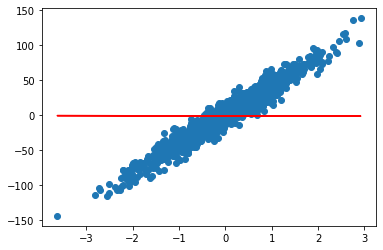

In [9]:
plt.scatter(x[:,0],y)
plt.plot(x[:,0], model(X,theta), c='r')

# COST FUNCTION

In [10]:
def cost_function(X, y, theta):
    return 1/(2*len(y))*np.sum((model(X,theta)-y)**2)

In [11]:
cost_function(X,y,theta)

925.1244568811311

# GRADIANT

In [12]:
def grad(X,y,theta):
    return 1/len(y) * X.T.dot(model(X,theta)-y)

In [13]:
def grad_descent(X, y, theta, learn_rate, n_ite):
    cost_history = np.zeros(n_ite)
    for i in range(0, n_ite) :
        theta = theta - learn_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history   

# EXEC

In [14]:
n_ite = 300
final_theta, cost_history = grad_descent(X, y, theta, learn_rate=0.01, n_ite=n_ite)

In [15]:
final_theta

array([[ 3.93121265e+01],
       [-3.07640192e-02]])

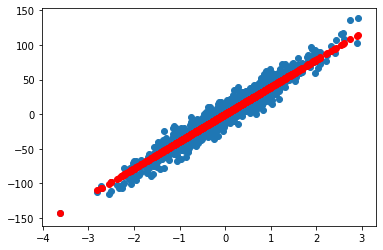

In [16]:
predictions = model(X,final_theta)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], predictions, c='r')

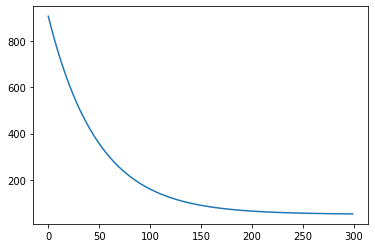

In [17]:
plt.plot(range(0,n_ite),cost_history)

# COEF DETERMINATION

In [18]:
def coef_determination(y, pred):
    u = (( y - pred )**2).sum()
    v = (( y - y.mean())**2).sum()
    return 1 - u/v

In [19]:
coef_determination(y, predictions)

0.9428796264364092